In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rend_df = pd.read_csv('C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\misc\\us-state-populations.csv')

In [3]:
rend_df

,code,state,pop_2014
0,AL,Alabama,4849377
1,AK,Alaska,736732
2,AZ,Arizona,6731484
3,AR,Arkansas,2966369
4,CA,California,38802500
5,CO,Colorado,5355866
6,CT,Connecticut,3596677
7,DE,Delaware,935614
8,DC,District of Columbia,658893
9,FL,Florida,19893297


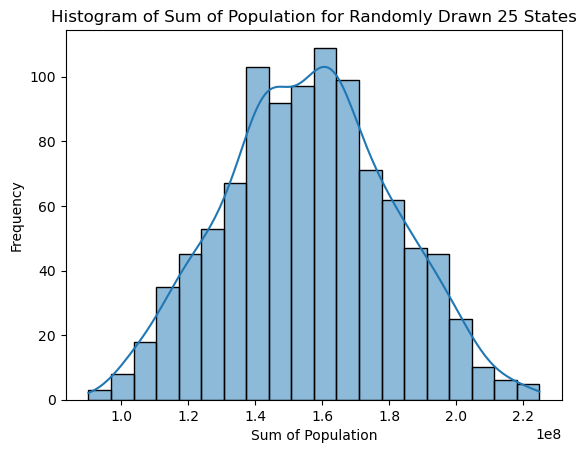

In [4]:
num_simulations = 1000

population_sums = []

for _ in range(num_simulations):
    sample = rend_df.sample(n=25)
    population_sum = sample['pop_2014'].sum()
    population_sums.append(population_sum)

sns.histplot(population_sums, kde=True)
plt.xlabel('Sum of Population')
plt.ylabel('Frequency')
plt.title('Histogram of Sum of Population for Randomly Drawn 25 States')
plt.show()

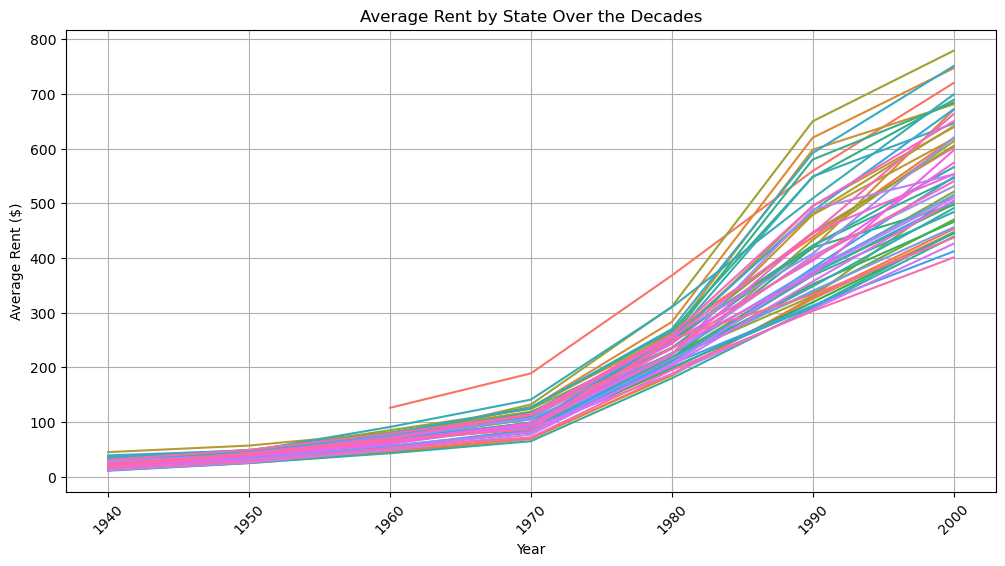

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
file_path = "C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\misc\\average rents by state.csv"
rend_df = pd.read_csv(file_path, na_values=["NA"])

# Ensure proper column names and data types
rend_df.columns = rend_df.columns.str.strip()
rend_df = rend_df.melt(id_vars=["Area"], var_name="Year", value_name="Average Rent")
rend_df["Year"] = rend_df["Year"].astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=rend_df, x="Year", y="Average Rent", hue="Area", legend=False)
plt.title("Average Rent by State Over the Decades")
plt.xlabel("Year")
plt.ylabel("Average Rent ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


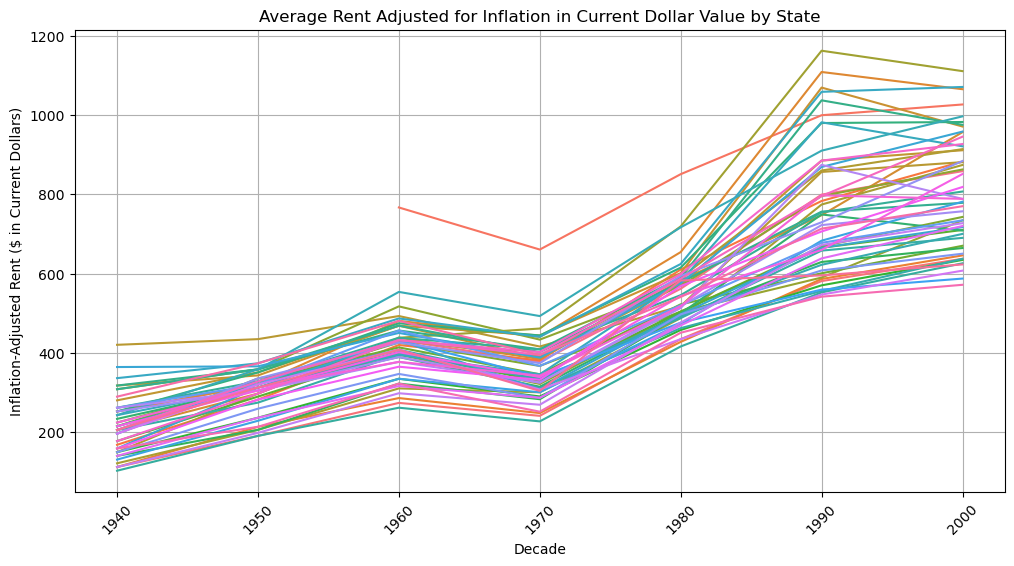

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load inflation data
inflation_path = "C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\misc\\inflation_rates.csv"
inflation_df = pd.read_csv(inflation_path, usecols=[0, 1])

# Clean inflation data
inflation_df.columns = ["Year", "Inflation Rate"]
inflation_df = inflation_df[inflation_df["Year"] >= 1930]
inflation_df["Inflation Rate"] = inflation_df["Inflation Rate"].str.rstrip("%").astype(float)

# Calculate cumulative inflation multiplier per decade
inflation_df["Decade"] = (inflation_df["Year"] // 10) * 10
cumulative_inflation = inflation_df.groupby("Decade")["Inflation Rate"].sum().reset_index()
cumulative_inflation["Inflation Multiplier"] = (1 + cumulative_inflation["Inflation Rate"] / 100).cumprod()

# Load rent data
rent_path = "C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\misc\\average rents by state.csv"
rent_df = pd.read_csv(rent_path)

# Transform rent data
rent_df = rent_df.melt(id_vars=["Area"], var_name="Year", value_name="Average Rent")
rent_df["Year"] = rent_df["Year"].astype(int)
rent_df["Decade"] = (rent_df["Year"] // 10) * 10

# Merge datasets
merged_df = rent_df.merge(cumulative_inflation, on="Decade")

# Adjust rent for inflation using the latest decade's dollar value
latest_multiplier = cumulative_inflation["Inflation Multiplier"].iloc[-1]
merged_df["Inflation Adjusted Rent"] = merged_df["Average Rent"] * (latest_multiplier / merged_df["Inflation Multiplier"])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x="Decade", y="Inflation Adjusted Rent", hue="Area", legend=False)
plt.title("Average Rent Adjusted for Inflation in Current Dollar Value by State")
plt.xlabel("Decade")
plt.ylabel("Inflation-Adjusted Rent ($ in Current Dollars)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [7]:
# Load division data
division_path = "C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\misc\\us census bureau regions and divisions.csv"
division_df = pd.read_csv(division_path, usecols=["State", "Division"])

# Rename columns for consistency
division_df.columns = ["Area", "Region"]

# Merge with rent data
merged_df = rent_df.merge(division_df, on="Area", how="right")

# Display merged dataframe
print(merged_df.head())

     Area    Year  Average Rent  Decade   Region
0  Alaska  2000.0         720.0  2000.0  Pacific
1  Alaska  1990.0         559.0  1990.0  Pacific
2  Alaska  1980.0         368.0  1980.0  Pacific
3  Alaska  1970.0         189.0  1970.0  Pacific
4  Alaska  1960.0         126.0  1960.0  Pacific


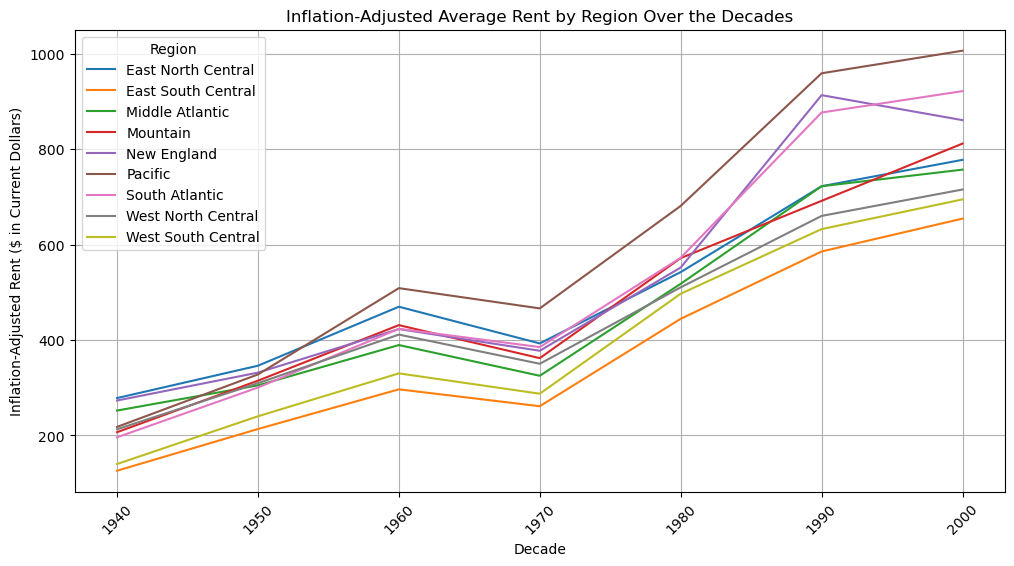

In [8]:
# Calculate average rent per region per decade
region_rent_df = merged_df.groupby(["Region", "Decade"])["Average Rent"].mean().reset_index()

# Merge with cumulative inflation multipliers
region_rent_df = region_rent_df.merge(cumulative_inflation, on="Decade")

# Adjust rent for inflation to today's dollar value
latest_multiplier = cumulative_inflation["Inflation Multiplier"].iloc[-1]
region_rent_df["Inflation Adjusted Rent"] = region_rent_df["Average Rent"] * (latest_multiplier / region_rent_df["Inflation Multiplier"])

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_rent_df, x="Decade", y="Inflation Adjusted Rent", hue="Region")
plt.title("Inflation-Adjusted Average Rent by Region Over the Decades")
plt.xlabel("Decade")
plt.ylabel("Inflation-Adjusted Rent ($ in Current Dollars)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Region")
plt.show()

In [9]:
import pandas as pd

# Read your data (replace 'your_file.csv' with actual file)
df = pd.read_csv("C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\Data Collection CS163  - 1980-2025-Flower.csv")

# Define the months in order and create a mapping dictionary
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_map = {month: i+1 for i, month in enumerate(months)}  # {'Jan': 1, 'Feb': 2, ..., 'Dec': 12}

# Melt the dataframe to reshape it
df_melted = df.melt(
    id_vars=["Year", "Year Avg", "Good Name", "Good Unit", "Source", "Price Unit"],
    value_vars=months,
    var_name="Month",
    value_name="Price"
)

# Handle years before 1980
df_melted.loc[df_melted["Year"] < 1980, "Price"] = None  # Clear all prices first
df_melted.loc[(df_melted["Year"] < 1980) & (df_melted["Month"] == "Jul"), "Price"] = df_melted["Year Avg"]  # Assign Year Avg to July

# Drop 'Year Avg' column as it's now embedded in July's price
df_melted = df_melted.drop(columns=["Year Avg"])

# Convert Month names to numbers
df_melted["Month"] = df_melted["Month"].map(month_map)

# Combine Year and Month into a single Date column (YYYY-MM-DD)
df_melted["Date"] = pd.to_datetime(df_melted["Year"].astype(str) + "-" + df_melted["Month"].astype(str) + "-01")

# Drop the now redundant Year, Month, and Price Unit columns
df_melted = df_melted.drop(columns=["Year", "Month", "Price Unit"])

# Reorder columns with Date first
df_melted = df_melted[["Date", "Price", "Good Name", "Good Unit", "Source"]]

# Sort by Date (newest first)
df_melted = df_melted.sort_values(by="Date", ascending=False).reset_index(drop=True)

print(df_melted)

           Date  Price Good Name Good Unit  \
0    2025-12-01    NaN     flour      $/lb   
1    2025-11-01    NaN     flour      $/lb   
2    2025-10-01    NaN     flour      $/lb   
3    2025-09-01    NaN     flour      $/lb   
4    2025-08-01    NaN     flour      $/lb   
...         ...    ...       ...       ...   
1627 1890-05-01    NaN     flour      $/lb   
1628 1890-04-01    NaN     flour      $/lb   
1629 1890-03-01    NaN     flour      $/lb   
1630 1890-02-01    NaN     flour      $/lb   
1631 1890-01-01    NaN     flour      $/lb   

                                                 Source  
0     https://www.bls.gov/regions/mid-atlantic/data/...  
1     https://www.bls.gov/regions/mid-atlantic/data/...  
2     https://www.bls.gov/regions/mid-atlantic/data/...  
3     https://www.bls.gov/regions/mid-atlantic/data/...  
4     https://www.bls.gov/regions/mid-atlantic/data/...  
...                                                 ...  
1627  https://babel.hathitrust.org/cgi/pt

In [24]:
# Load the CSV
df = pd.read_csv("C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\Data Collection CS163  - Goods prices - one table.csv")

# Convert 'Date' column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract Year and Month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

# Separate data before and after 1980
df_before_1980 = df[df["Year"] < 1980].copy()
df_after_1980 = df[df["Year"] >= 1980]

# Get the July prices for each year before 1980
july_prices = df_before_1980[df_before_1980["Month"] == 7][["Year", "Good Name", "Price"]].dropna()

# Merge July prices back into df_before_1980, applying to all months
df_before_1980 = df_before_1980.drop(columns=["Price"]).merge(july_prices, on=["Year", "Good Name"], how="left")

# Combine with data from 1980 onwards
df_fixed = pd.concat([df_before_1980, df_after_1980])

# Drop unnecessary columns
df_fixed = df_fixed.drop(columns=["Year", "Month"])

# Reorder columns
df_fixed = df_fixed[["Date", "Price", "Good Name", "Good Unit", "Source"]]

# Sort by Good Name first, then Date in descending order
df_fixed = df_fixed.sort_values(by=["Good Name", "Date"], ascending=[True, False])

# Save the final CSV
df_fixed.to_csv("updated_file.csv", index=False)

print("CSV successfully updated!")


CSV successfully updated!


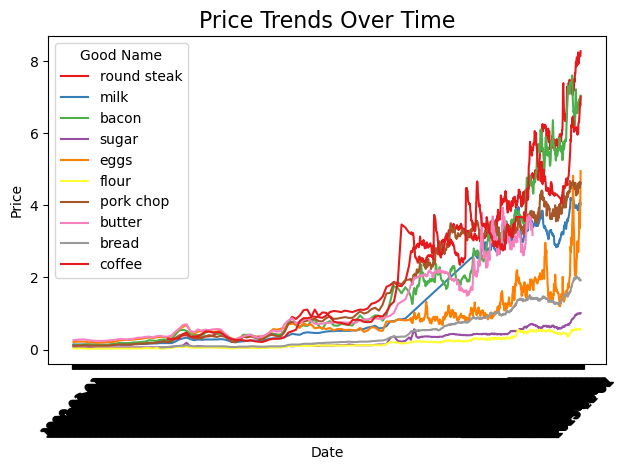

In [10]:
goods = pd.read_csv("C:\\Users\\ryanf\\Documents\\GitHub\\misc\\priv_misc\\Data Collection CS163  - Goods prices - one table.csv")

import seaborn as sns
import matplotlib.pyplot as plt

goods = goods.sort_values(by="Date", ascending=True)

# Plot using lineplot, which can handle datetime directly
a = sns.lineplot(
    x="Date",
    y="Price",
    data=goods,
    hue="Good Name",
    palette="Set1"
)

# Customize labels and title
a.set(ylabel="Price")
a.set_title("Price Trends Over Time", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [12]:
import plotly.graph_objects as go

# Sort the data by Date to ensure the proper order (earlier dates on the left)
goods = goods.sort_values("Date", ascending=True)

# Create the line plot using Plotly Graph Objects
fig = go.Figure()

# Add a trace for each 'Good Name'
for good_name in goods["Good Name"].unique():
    filtered_data = goods[goods["Good Name"] == good_name]
    fig.add_trace(go.Scatter(
        x=filtered_data["Date"],  # x-axis = Date
        y=filtered_data["Price"],  # y-axis = Price
        mode="lines",  # Line plot
        name=good_name  # Legend by Good Name
    ))

# Update layout to make it more readable
fig.update_layout(
    title="Price Trends Over Time",
    xaxis_title="Date",
    yaxis_title="Price",
    title_font_size=16,
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    hovermode="x unified"  # Make the hover show all points for the same date
)

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [2]:
import pandas as pd


In [7]:
df = pd.read_csv("./income-by-area.csv")
df = df.drop_duplicates(subset='Year', keep='first').reset_index(drop=True)
df

,Year,Alabama,Alaska *,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,United States *,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Source
0,2023,48945,65943.0,56293,52282,69140,70179,76114,58787,89538,...,60147,61291,56039,59456,64506,71225,48076,57829,72699,https://apps.bea.gov/iTable/?reqid=70&step=30&...
1,2022,45782,62639.0,51686,49139,62606,65296,69134,54838,82046,...,55978,56517,51607,55217,59165,64899,44999,53940,65704,https://apps.bea.gov/iTable/?reqid=70&step=30&...
2,2021,45709,60359.0,50772,47663,64402,62204,68459,52031,82036,...,54385,56320,50459,53788,58215,64824,44632,53762,62202,https://apps.bea.gov/iTable/?reqid=70&step=30&...
3,2020,41829,57332.0,46918,42969,60053,56981,65283,48988,76320,...,50019,52357,45668,52298,53828,60442,41231,49618,58210,https://apps.bea.gov/iTable/?reqid=70&step=30&...
4,2019,39010,55794.0,42759,39700,54899,53664,62942,47332,70144,...,48325,48915,42594,48556,50771,56496,38823,46369,55690,https://apps.bea.gov/iTable/?reqid=70&step=30&...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1952,1051,NaN,1599,979,2028,1755,2020,1850,2348,...,1439,1590,1506,1278,1461,1837,1117,1607,1784,https://apps.bea.gov/iTable/?reqid=70&step=30&...
72,1951,993,NaN,1536,912,1933,1698,1927,1791,2275,...,1375,1529,1475,1249,1389,1757,1085,1571,1836,https://apps.bea.gov/iTable/?reqid=70&step=30&...
73,1950,868,NaN,1305,808,1779,1455,1729,1721,2218,...,1278,1409,1309,1108,1238,1667,983,1394,1671,https://apps.bea.gov/iTable/?reqid=70&step=30&...
74,1949,792,NaN,1261,781,1647,1359,1537,1520,2085,...,1219,1294,1218,1072,1104,1534,952,1280,1585,https://apps.bea.gov/iTable/?reqid=70&step=30&...
